<h2><b>Bayesian Problem #02: Chatbot Resolution Rate</b></h2>

You’re checking how well a customer service chatbot did during a test run where it handled 1,500 chats and managed to resolve 1,275 of them without passing the issue on to a human. The goal is to estimate how effective the chatbot really is and figure out how likely it is that its success rate is above 85% — a solid mark for great automated support.

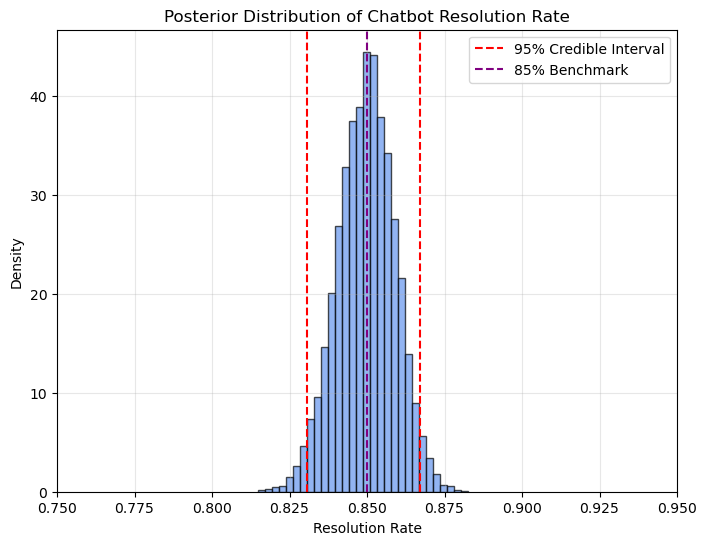

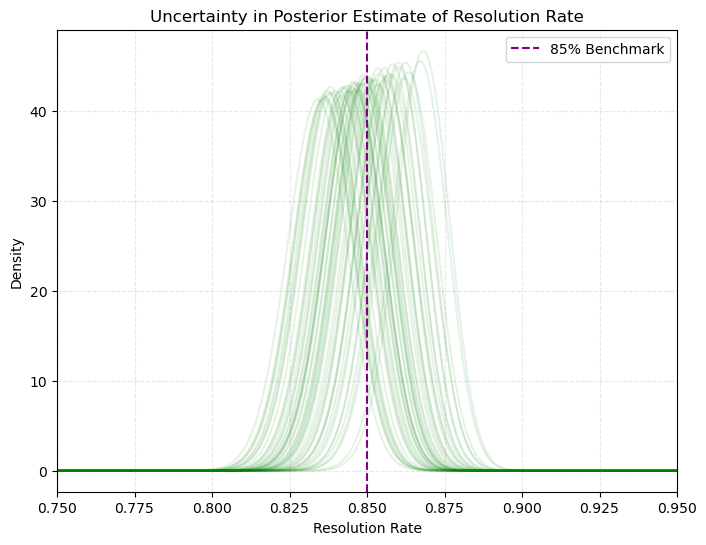


🤖 Chatbot Resolution Rate Estimate (Bayesian Inference)
• Mean resolution rate: 0.8495
• Mode resolution rate: 0.8500
• 95% credible interval: (0.831, 0.867)
• Probability resolution rate > 85%: 0.4911

📌 CONCLUSION:
Based on the pilot test, the chatbot has an estimated average resolution rate of 85.0%. With a 95% credible interval from 83.1% to 86.7%, there's a 49.1% chance the true resolution rate exceeds the 85% benchmark, suggesting excellent effectiveness for automated customer service handling.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Reproducibility
np.random.seed(42)

# Observed data
total_chats = 1500
resolved_by_bot = 1275

# Prior: uniform (Beta(1, 1))
prior_alpha = 1
prior_beta = 1

# Posterior parameters
posterior_alpha = prior_alpha + resolved_by_bot
posterior_beta = prior_beta + (total_chats - resolved_by_bot)

# Posterior samples
posterior_samples = np.random.beta(posterior_alpha, posterior_beta, size=10000)

# 95% credible interval
credible_interval = np.percentile(posterior_samples, [2.5, 97.5])

# ----------------------------- #
# First Graph: Posterior Distribution
plt.figure(figsize=(8, 6))
plt.hist(posterior_samples, bins=30, density=True, color='cornflowerblue', edgecolor='black', alpha=0.7)
plt.axvline(credible_interval[0], color='red', linestyle='--', label='95% Credible Interval')
plt.axvline(credible_interval[1], color='red', linestyle='--')
plt.axvline(0.85, color='purple', linestyle='--', label='85% Benchmark')
plt.title('Posterior Distribution of Chatbot Resolution Rate')
plt.xlabel('Resolution Rate')
plt.ylabel('Density')
plt.legend()
plt.xlim(0.75, 0.95)
plt.grid(alpha=0.3)
plt.show()

# ----------------------------- #
# Second Graph: Posterior Density Overlays for Uncertainty
x = np.linspace(0, 1, 1000)
plt.figure(figsize=(8, 6))
for _ in range(50):
    alpha_sample = np.random.gamma(shape=posterior_alpha, scale=1.0)
    beta_sample = np.random.gamma(shape=posterior_beta, scale=1.0)
    y = beta.pdf(x, alpha_sample, beta_sample)
    plt.plot(x, y, color='green', alpha=0.1)

plt.axvline(0.85, color='purple', linestyle='--', label='85% Benchmark')
plt.title('Uncertainty in Posterior Estimate of Resolution Rate')
plt.xlabel('Resolution Rate')
plt.ylabel('Density')
plt.legend()
plt.xlim(0.75, 0.95)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# ----------------------------- #
# Summary statistics
mean_rate = posterior_alpha / (posterior_alpha + posterior_beta)
mode_rate = (posterior_alpha - 1) / (posterior_alpha + posterior_beta - 2)
prob_above_85 = np.mean(posterior_samples > 0.85)

# Print results
print("\n\033[1m🤖 Chatbot Resolution Rate Estimate (Bayesian Inference)\033[0m")
print(f"• Mean resolution rate: \033[94m{mean_rate:.4f}\033[0m")
print(f"• Mode resolution rate: \033[94m{mode_rate:.4f}\033[0m")
print(f"• 95% credible interval: \033[94m({credible_interval[0]:.3f}, {credible_interval[1]:.3f})\033[0m")
print(f"• Probability resolution rate > 85%: \033[92m{prob_above_85:.4f}\033[0m")

# ----------------------------- #
# Bold conclusion
print("\n\033[1m📌 CONCLUSION:\033[0m")
print("\033[1mBased on the pilot test, the chatbot has an estimated average resolution rate of {:.1f}%. "
      "With a 95% credible interval from {:.1f}% to {:.1f}%, there's a {:.1f}% chance the true resolution rate "
      "exceeds the 85% benchmark, suggesting excellent effectiveness for automated customer service handling.\033[0m"
      .format(mean_rate * 100, credible_interval[0] * 100, credible_interval[1] * 100, prob_above_85 * 100))
